<h1>Proyecto Análisis A/B</h1>

**Descripción del Proyecto de Kaggle:** 

Para determinar si los anuncios por una campaña tienen efectos en las compras por parte de los clientes se cuenta con un set de datos con el resultado de un proceso experimental de publicidad. Algunas personas estuvieron expuestas a anuncios (Grupo AD - Experimental) y otras solo recibieron anuncios publicos o ningún anuncio (PSA).

Dataset descargado de Kaggle (Licencia CCO: Public domain): [Link al dataset](https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing?resource=download)

In [25]:
#importamos las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
%matplotlib inline


## Lectura y análisis exploratorio inicial de datos

In [26]:
#Lectura de los datos y carga a la variable data_mk
data_mk = pd.read_csv('marketing_AB.csv')

In [27]:
#imprimir primeros registros
data_mk.head(10)

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
5,5,1137664,ad,False,734,Saturday,10
6,6,1116205,ad,False,264,Wednesday,13
7,7,1496843,ad,False,17,Sunday,18
8,8,1448851,ad,False,21,Tuesday,19
9,9,1446284,ad,False,142,Monday,14


In [28]:
#imprimir la cola de la tabla
data_mk.tail()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23
588100,588100,1237779,ad,False,1,Tuesday,23


In [29]:
#estructura de columnas y filas de la tabla
data_mk.shape
print(data_mk.shape[0])

588101


In [30]:
#info ppal de la tabla
data_mk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [31]:
#principales estadísticas
print(data_mk.describe(include="all"))

           Unnamed: 0       user id test group converted      total ads  \
count   588101.000000  5.881010e+05     588101    588101  588101.000000   
unique            NaN           NaN          2         2            NaN   
top               NaN           NaN         ad     False            NaN   
freq              NaN           NaN     564577    573258            NaN   
mean    294050.000000  1.310692e+06        NaN       NaN      24.820876   
std     169770.279668  2.022260e+05        NaN       NaN      43.715181   
min          0.000000  9.000000e+05        NaN       NaN       1.000000   
25%     147025.000000  1.143190e+06        NaN       NaN       4.000000   
50%     294050.000000  1.313725e+06        NaN       NaN      13.000000   
75%     441075.000000  1.484088e+06        NaN       NaN      27.000000   
max     588100.000000  1.654483e+06        NaN       NaN    2065.000000   

       most ads day  most ads hour  
count        588101  588101.000000  
unique            7      

In [32]:
#detectar valores na
print(data_mk.isna().sum())

print('Conclusion No se detectan nulos')

Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64
Conclusion No se detectan nulos


## Analisis preliminar de los datos por campo

* **user id:** Es el numero que identifica al cliente. Lo dejamos para analizar el comportamiento si se repiten.
* **test group:** Nos indica si el cliente miró los avisos o lo vio en el servicio público.
* **converted:** Si la persona compro el producto.
* **total ads** Cantidad de anuncios vistos por persona.
* **most ads day:** Día que la persona vio la mayor cantidad de anuncios.
* **most ads hour** Hora del día en que la persona vio la mayor cantidad de anuncios.

_Por ahora se dejan todas las columnas. con esto damos por completado el preprocesamiento de los datos_

In [33]:
#agrupamos los registros por la col "user id" para ver usuarios repetidos
print("Usuarios repetidos " + str(data_mk.groupby(by=["user id"])['user id'].nunique().count()))

Usuarios repetidos 588101


In [34]:
#agrupamos los registros por la col "converted" 
data_mk.groupby(by=["converted"])['user id'].count()

converted
False    573258
True      14843
Name: user id, dtype: int64

In [35]:
#agrupamos los registros por la col "converted" y "test group"
data_mk.groupby(by=["converted", "test group"]).count()["user id"]

converted  test group
False      ad            550154
           psa            23104
True       ad             14423
           psa              420
Name: user id, dtype: int64

In [36]:
#agrupamos los registros por la col "test group" "converted" 
data_mk.groupby(by=["test group", "converted"]).count()["user id"]

test group  converted
ad          False        550154
            True          14423
psa         False         23104
            True            420
Name: user id, dtype: int64

In [37]:
#agrupar por tipo de cliente
tipo_adv = data_mk.groupby(by=["test group"])["user id"].count()

print(tipo_adv.keys())

Index(['ad', 'psa'], dtype='object', name='test group')


<Axes: title={'center': 'Clientes Agrupados Por Tipo De Aviso'}, ylabel='user id'>

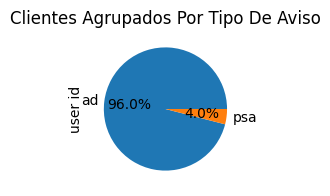

In [38]:
tipo_adv.plot.pie(figsize= (2,2),autopct='%1.1f%%', title="Clientes Agrupados Por Tipo De Aviso")

## Limpieza De Datos

In [39]:
#Ver columnas del DF
data_mk.columns

Index(['Unnamed: 0', 'user id', 'test group', 'converted', 'total ads',
       'most ads day', 'most ads hour'],
      dtype='object')

In [40]:
#Quitar espacio de nombres de campos. 
data_mk.rename(columns=lambda e: e.strip().replace(" ", "_"), inplace=True)
data_mk.columns

Index(['Unnamed:_0', 'user_id', 'test_group', 'converted', 'total_ads',
       'most_ads_day', 'most_ads_hour'],
      dtype='object')

In [41]:
#eliminamos col unnamed porque repite los indices del DF
data_mk.drop(['Unnamed:_0'], axis=1)


,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...
588096,1278437,ad,False,1,Tuesday,23
588097,1327975,ad,False,1,Tuesday,23
588098,1038442,ad,False,3,Tuesday,23
588099,1496395,ad,False,1,Tuesday,23


### Análisis A/B
* Plantear hipótesis nula (H0) y alternativa (H1).
* Definir nivel de confianza.
* Definir estadístico de contraste y cálculo del PValor.
* Comparar Pvalor con alpha.

##### 1-Definicion de hipótesis

H0 = "No existen diferencias de conversion entre hacer o no hacer campaña publicitaria". <br>
H1 = "Existen diferencias entre hacer campañas o no"

##### 2-Definimos nivel de confianza

Se define en el 95% por lo que el alpha es del 5%.

3-Cálculos, definición del estádístico de contraste y pvalor

In [42]:
# convertimos columna de conversión a valores enteros

data_mk['converted'] = data_mk['converted'].astype(int)
data_mk.head()

,Unnamed:_0,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,0,1069124,ad,0,130,Monday,20
1,1,1119715,ad,0,93,Tuesday,22
2,2,1144181,ad,0,21,Tuesday,18
3,3,1435133,ad,0,355,Tuesday,10
4,4,1015700,ad,0,276,Friday,14


In [43]:
#Filtramos el df y en uno dejamos solo los que tuvieron aviso y en otro los que no
tratamiento_ad = data_mk.query('test_group == "ad"')
control_psa = data_mk.query('test_group == "psa"')

print(tratamiento_ad.head()['test_group'])
print(control_psa.head()['test_group'])


0    ad
1    ad
2    ad
3    ad
4    ad
Name: test_group, dtype: object
18     psa
38     psa
68     psa
140    psa
157    psa
Name: test_group, dtype: object


In [44]:
#Cálculamos los valores de conversion de los tres df
print("Promedio conversión df tratamiento ad: " + str(tratamiento_ad['converted'].mean()))
print("Promedio conversión df control psa: " + str(control_psa['converted'].mean()))
print("Promedio conversión df global: " + str(data_mk['converted'].mean()))

Promedio conversión df tratamiento ad: 0.025546559636683747
Promedio conversión df control psa: 0.01785410644448223
Promedio conversión df global: 0.02523886203220195


In [45]:
## esto calcula la cantidad de clientes que vieron anuncio y comprar dividido todos los que recibieron anuncio
tasa_convert_ad=len(tratamiento_ad.query('converted == 1')) / len(tratamiento_ad)


## esto calcula la cantidad de clientes que vieron anuncio y comprar dividido todos los que no recibieron anuncio
tasa_convert_psa=len(control_psa.query('converted == 1')) / len(control_psa) 

print("conversion con anuncio:" + str(tasa_convert_ad))
print("conversion sin anuncio:" + str(tasa_convert_psa))

conversion con anuncio:0.025546559636683747
conversion sin anuncio:0.01785410644448223


#### Aplicamos Test Z

In [46]:
#creamos variables y las cargamos a arrays de numpy porque asi lo pide la fc
conv_adv = len(tratamiento_ad.query('converted == 1'))
tot_adv = len(tratamiento_ad)
conv_psa = len(control_psa.query('converted == 1')) 
tot_psa = len(control_psa) 

#creamos listas numpy
arr_convert = np.array([conv_adv, conv_psa])
arr_vis = np.array([tot_adv, tot_psa])


#calculos con ZTest en ambas direcciones
pvalor = proportions_ztest(count=arr_convert, nobs=arr_vis)[1]
tvalor = proportions_ztest(count=arr_convert, nobs=arr_vis)[0]
print("Se deja el parámetro 'Alternative' que plantea por defecto probar si hay una diferencia significativa en ambas direcciones.")
print("P valor: " + str(pvalor))
print("T valor: " + str(tvalor))
status_prueba1 = ""

if pvalor<0.05:
    print("Rechazo h0: Se confirma que los que vieron el anuncio compraron mas")
else:
    print("No Rechazo h0: No existe evidencia estadística que nos confirme que ver el anuncio impacte en la compra")




Se deja el parámetro 'Alternative' que plantea por defecto probar si hay una diferencia significativa en ambas direcciones.
P valor: 1.7052807161559727e-13
T valor: 7.3700781265454145
Rechazo h0: Se confirma que los que vieron el anuncio compraron mas


In [47]:
#calculos con ZTest tipo larger para probar si la proporción en la primera muestra es mayor que en la segunda muestra.
pvalor = proportions_ztest(count=arr_convert, nobs=arr_vis, alternative='larger')[1]
tvalor = proportions_ztest(count=arr_convert, nobs=arr_vis, alternative='larger')[0]
print("Se deja el parámetro 'Alternative' que plantea por defecto probar si hay una diferencia significativa en ambas direcciones.")
print("P valor: " + str(pvalor))
print("T valor: " + str(tvalor))
status_prueba1 = ""

if pvalor < 0.05:
    print("Rechazo h0: Se confirma que los que vieron el anuncio compraron mas")
else:
    print("No Rechazo h0: No existe evidencia estadística que nos confirme que ver el anuncio impacte en la compra")

Se deja el parámetro 'Alternative' que plantea por defecto probar si hay una diferencia significativa en ambas direcciones.
P valor: 8.526403580779863e-14
T valor: 7.3700781265454145
Rechazo h0: Se confirma que los que vieron el anuncio compraron mas


### Conclusión

<p>A partir del test se comprobó que la tasa superior de conversión de las personas que vieron anuncios, es estadísticamente representativa, por lo tanto se recomienta implementar las campañas por el efecto positivo que tienen en las compras de los clientes.</p>